# 1 Preliminaries

## 1.1 System

In [1]:
pwd

'/home/alex/gargaml/examples'

In [2]:
cd ..

/home/alex/gargaml


In [3]:
pwd

'/home/alex/gargaml'

In [4]:
ls

CHANGELOG.md  examples/  pyproject.toml    setup.py  utils/
docs/         gargaml/   README.md         src/
env/          LICENSE    requirements.txt  tests/


In [5]:
!uname -a

Linux asus2023 6.2.0-20-generic #20-Ubuntu SMP PREEMPT_DYNAMIC Thu Apr  6 07:48:48 UTC 2023 x86_64 x86_64 x86_64 GNU/Linux


In [6]:
!which python

/home/alex/gargaml/env/bin/python


## 1.2 Install

In [7]:
# !pip install -r requirements.txt

In [8]:
# !pip freeze > requirements.freeze

## 1.3 Import

In [9]:
from gargaml import * 

In [10]:
# import random, os, sys, warnings, datetime, time, logging
# from IPython.display import display
# # pandarallel

# import pandas as pd
# import numpy as np

# import scipy as sp
# import scipy.stats as st

# import matplotlib.pyplot as plt
# import seaborn as sns
# import plotly.express as px
# from plotly.subplots import make_subplots
# import plotly.graph_objects as go
# import plotly.io as pio
# import missingno as msno


# from sklearn.base import *

# from sklearn.feature_selection import *
# from sklearn.feature_extraction import *
# from sklearn.preprocessing import *
# from sklearn.pipeline import *
# from sklearn.covariance import *
# from sklearn.decomposition import *
# from sklearn.model_selection import *
# from sklearn.impute import *
# from sklearn.metrics import * 
# from sklearn.cluster import * 
# from sklearn.compose import *

# from sklearn.dummy import *
# from sklearn.linear_model import *
# from sklearn.svm import *
# from sklearn.neighbors import *
# from sklearn.ensemble import *


# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.pipeline import Pipeline

# # from xgboost import XGBRegressor, XGBRFRegressor

## 1.4 Data

In [11]:
[i for i in Loads.__dict__.keys() if "__" not in i]

['boston', 'ames', 'iris', 'seattle', 'hr', 'titanic', 'house', 'minst']

In [12]:
# df = Loads.ames(X_y=False, nan_rate=0.3)
df = Loads.titanic(X_y=False)

df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


## 1.5 Options and Graphics 

In [13]:
sns.set()

In [14]:
DISPLAY = True
FRAC = 1.0
LAZY = False

In [15]:
# warnings.filterwarnings('ignore')
warnings.filterwarnings(action="once")

In [16]:
# pio.renderers.default = "png"


## 1.6 Third parties and utils

In [17]:
# nlp or other

## 1.7 Functions and class

In [18]:
# local functions

# 2 First Tour

## 2.0 Pre-cleaning

In [19]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [20]:
clean  = lambda i :  i.lower().strip()
df.columns = map(clean, df.columns)
df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [21]:
for c in df.select_dtypes(include=object).columns : 
    try : 
        df[c] = df[c].str.lower()
    except Exception as e : 
        print(e)

In [22]:
df.passengerid = df.passengerid.astype(str)
df.sex = df.sex.apply(lambda i : 0 if "fe" in i else 1)
df

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"braund, mr. owen harris",1,22.0,1,0,a/5 21171,7.2500,NaN,s
1,2,1,1,"cumings, mrs. john bradley (florence briggs th...",0,38.0,1,0,pc 17599,71.2833,c85,c
2,3,1,3,"heikkinen, miss. laina",0,26.0,0,0,ston/o2. 3101282,7.9250,NaN,s
3,4,1,1,"futrelle, mrs. jacques heath (lily may peel)",0,35.0,1,0,113803,53.1000,c123,s
4,5,0,3,"allen, mr. william henry",1,35.0,0,0,373450,8.0500,NaN,s
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"montvila, rev. juozas",1,27.0,0,0,211536,13.0000,NaN,s
887,888,1,1,"graham, miss. margaret edith",0,19.0,0,0,112053,30.0000,b42,s
888,889,0,3,"johnston, miss. catherine helen ""carrie""",0,NaN,1,2,w./c. 6607,23.4500,NaN,s
889,890,1,1,"behr, mr. karl howell",1,26.0,0,0,111369,30.0000,c148,c


## 2.1 Display

In [23]:
EDA.first_tour.display(df)

----HEAD ----,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"braund, mr. owen harris",1,22.0,1,0,a/5 21171,7.2500,NaN,s
1,2,1,1,"cumings, mrs. john bradley (florence briggs th...",0,38.0,1,0,pc 17599,71.2833,c85,c
2,3,1,3,"heikkinen, miss. laina",0,26.0,0,0,ston/o2. 3101282,7.9250,NaN,s
3,4,1,1,"futrelle, mrs. jacques heath (lily may peel)",0,35.0,1,0,113803,53.1000,c123,s
4,5,0,3,"allen, mr. william henry",1,35.0,0,0,373450,8.0500,NaN,s


----SAMP ----,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
879,880,1,1,"potter, mrs. thomas jr (lily alexenia wilson)",0,56.0,0,1,11767,83.1583,c50,c
457,458,1,1,"kenyon, mrs. frederick r (marion)",0,NaN,1,0,17464,51.8625,d21,s
25,26,1,3,"asplund, mrs. carl oscar (selma augusta emilia...",0,38.0,1,5,347077,31.3875,NaN,s
106,107,1,3,"salkjelsvik, miss. anna kristine",0,21.0,0,0,343120,7.6500,NaN,s
595,596,0,3,"van impe, mr. jean baptiste",1,36.0,1,1,345773,24.1500,NaN,s
290,291,1,1,"barber, miss. ellen ""nellie""",0,26.0,0,0,19877,78.8500,NaN,s
239,240,0,2,"hunt, mr. george henry",1,33.0,0,0,sco/w 1585,12.2750,NaN,s
52,53,1,1,"harper, mrs. henry sleeper (myna haxtun)",0,49.0,1,0,pc 17572,76.7292,d33,c
236,237,0,2,"hold, mr. stephen",1,44.0,1,0,26707,26.0000,NaN,s
543,544,1,2,"beane, mr. edward",1,32.0,1,0,2908,26.0000,NaN,s


----TAIL ----,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
886,887,0,2,"montvila, rev. juozas",1,27.0,0,0,211536,13.00,NaN,s
887,888,1,1,"graham, miss. margaret edith",0,19.0,0,0,112053,30.00,b42,s
888,889,0,3,"johnston, miss. catherine helen ""carrie""",0,NaN,1,2,w./c. 6607,23.45,NaN,s
889,890,1,1,"behr, mr. karl howell",1,26.0,0,0,111369,30.00,c148,c
890,891,0,3,"dooley, mr. patrick",1,32.0,0,0,370376,7.75,NaN,q


## 2.2 Structure

In [24]:
EDA.first_tour.info(df)

'shape (891, 12), memory 0.09MB'

'---- FLO ----'

,cols,types,nan_sum,nan_mean,uniq_sum,uniq_rate,is_sku
0,age,float64,177,0.2,88,0.10,False
1,fare,float64,0,0.0,248,0.28,False


'---- INT ----'

,cols,types,nan_sum,nan_mean,uniq_sum,uniq_rate,is_sku
0,survived,int64,0,0.0,2,0.00,False
1,pclass,int64,0,0.0,3,0.00,False
2,sex,int64,0,0.0,2,0.00,False
3,sibsp,int64,0,0.0,7,0.01,False
4,parch,int64,0,0.0,7,0.01,False


'---- OBJ ----'

,cols,types,nan_sum,nan_mean,uniq_sum,uniq_rate,is_sku
0,passengerid,object,0,0.00,891,1.00,True
1,name,object,0,0.00,891,1.00,True
2,ticket,object,0,0.00,681,0.76,False
3,cabin,object,687,0.77,147,0.16,False
4,embarked,object,2,0.00,3,0.00,False


In [25]:
df.dtypes.value_counts()

object     5
int64      5
float64    2
Name: count, dtype: int64

## 2.3 NaN and duplicated

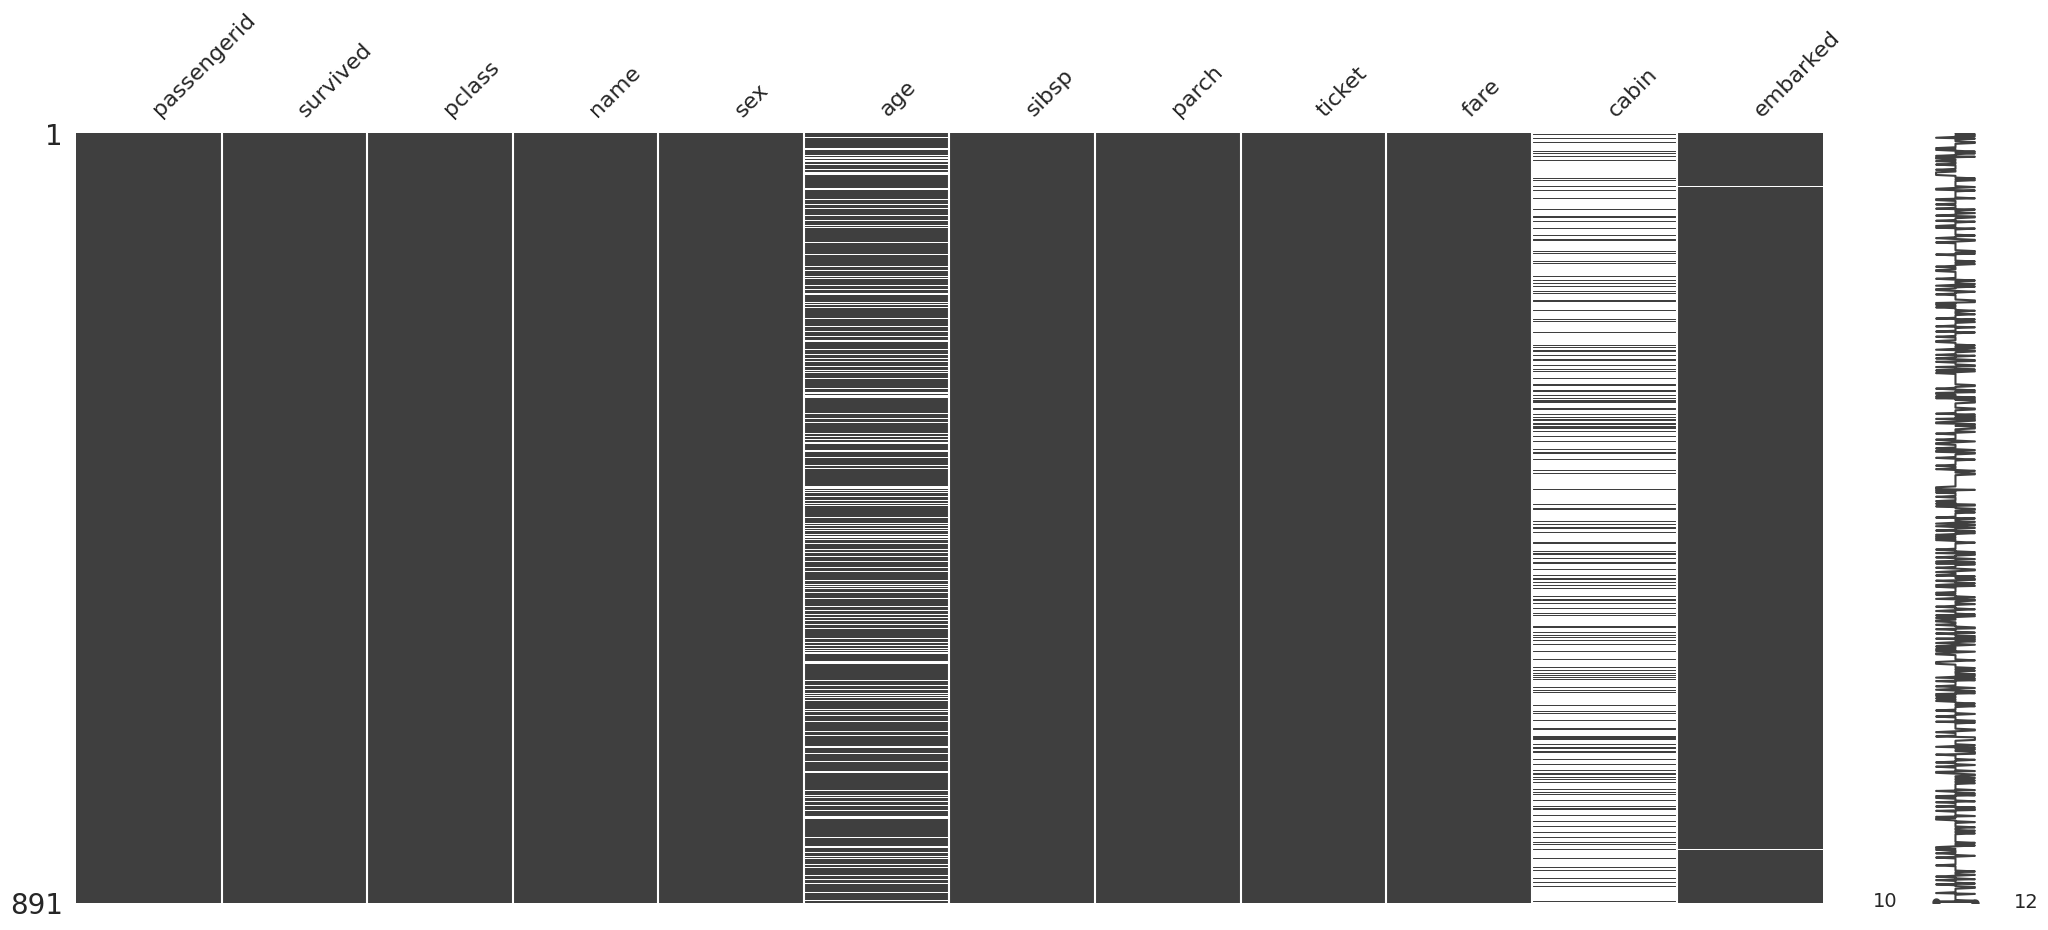

In [26]:
EDA.nan.viz(df)

In [27]:
EDA.nan.rate(df)

cabin          0.771
age            0.199
embarked       0.002
passengerid    0.000
survived       0.000
pclass         0.000
name           0.000
sex            0.000
sibsp          0.000
parch          0.000
ticket         0.000
fare           0.000
dtype: float64

In [28]:
EDA.nan.rate(df, threshold=0.75)

cabin    0.771
dtype: float64

In [29]:
EDA.nan.rate(df, axis=1, threshold=0.1)

502    0.167
773    0.167
517    0.167
783    0.167
359    0.167
       ...  
837    0.167
274    0.167
240    0.167
470    0.167
241    0.167
Length: 158, dtype: float64

In [30]:
EDA.nan.rate(df, axis=1, threshold=0.1).value_counts()

0.167    158
Name: count, dtype: int64

In [31]:
df.shape

(891, 12)

In [32]:
round(2/12, 4)

0.1667

In [33]:
# EDA.nan.cols(df, threshold=0.1)

In [34]:
# EDA.nan.duplicated(df)

In [35]:
df.duplicated().sum()

0

## 2.4 Data Inspection

In [36]:
EDA.first_tour.describe(df)

---- FLO ----,age,fare
count,714.00,891.00
mean,29.70,32.20
std,14.53,49.69
min,0.42,0.00
25%,20.12,7.91
50%,28.00,14.45
75%,38.00,31.00
max,80.00,512.33


---- INT ----,survived,pclass,sex,sibsp,parch
count,891.00,891.00,891.00,891.00,891.00
mean,0.38,2.31,0.65,0.52,0.38
std,0.49,0.84,0.48,1.10,0.81
min,0.00,1.00,0.00,0.00,0.00
25%,0.00,2.00,0.00,0.00,0.00
50%,0.00,3.00,1.00,0.00,0.00
75%,1.00,3.00,1.00,1.00,0.00
max,1.00,3.00,1.00,8.00,6.00


---- OBJ ----,passengerid,name,ticket,cabin,embarked
count,891,891,891,204,889
unique,891,891,681,147,3
top,1,"braund, mr. owen harris",347082,b96 b98,s
freq,1,1,7,4,644


,survived,pclass,sex,age,sibsp,parch,fare
survived,,,,,,,
pclass,-0.34,,,,,,
sex,-0.54,0.13,,,,,
age,-0.08,-0.37,0.09,,,,
sibsp,-0.04,0.08,-0.11,-0.31,,,
parch,0.08,0.02,-0.25,-0.19,0.41,,
fare,0.26,-0.55,-0.18,0.1,0.16,0.22,


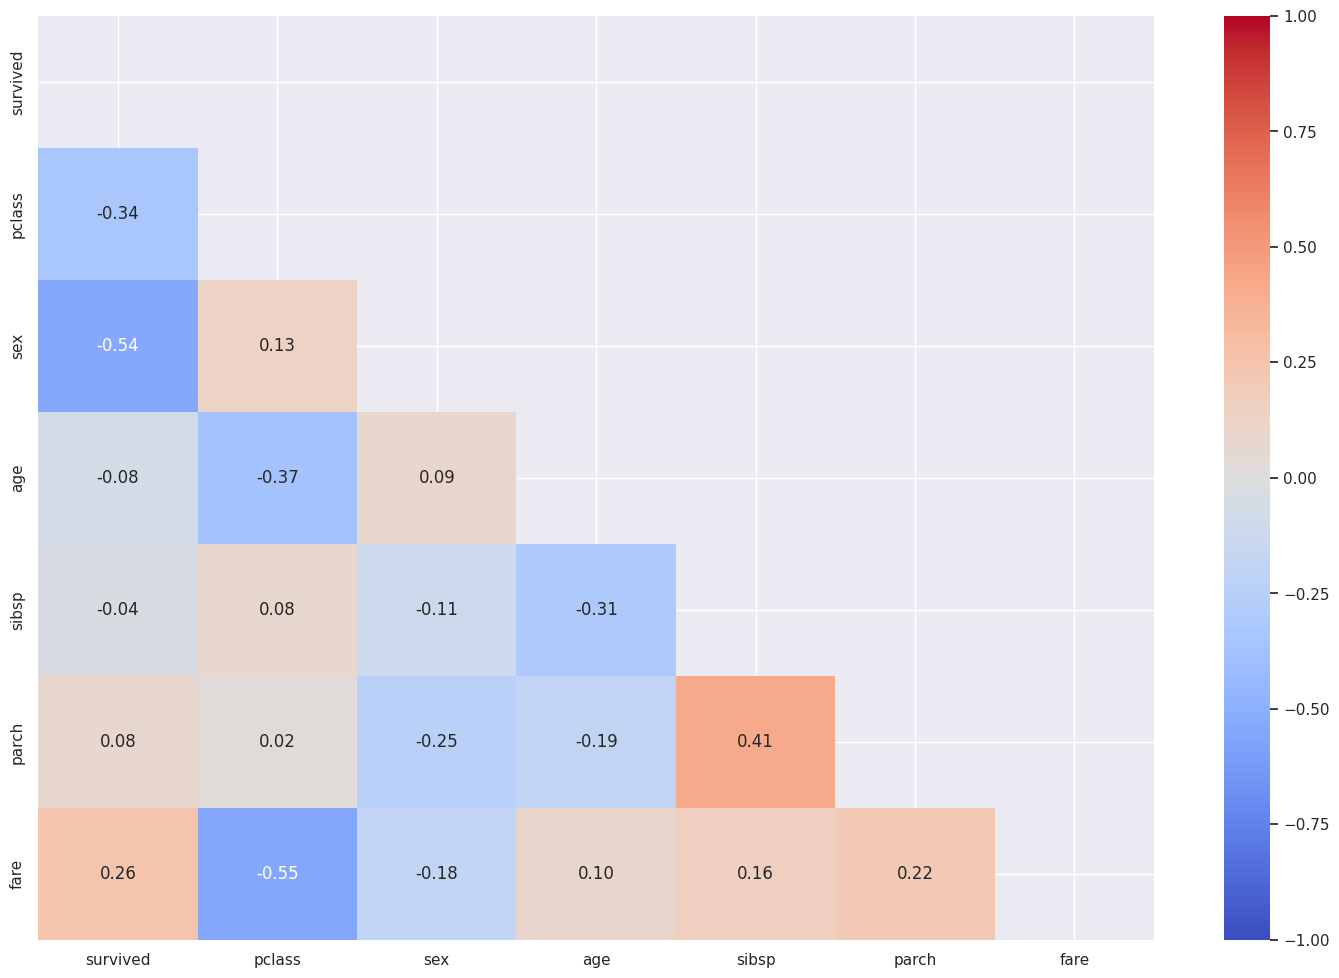

In [37]:
EDA.study.corr(df)

In [38]:
EDA.study.skew(df)

,col,raw_skew,log1p,log_skew,gain
0,survived,0.48,1,0.48,0.00
1,pclass,-0.63,1,-0.77,-0.22
2,sex,-0.62,1,-0.62,0.00
3,age,0.39,1,-2.07,6.32
4,sibsp,3.70,1,1.66,0.55
5,parch,2.75,1,1.68,0.39
6,fare,4.79,1,0.39,0.92


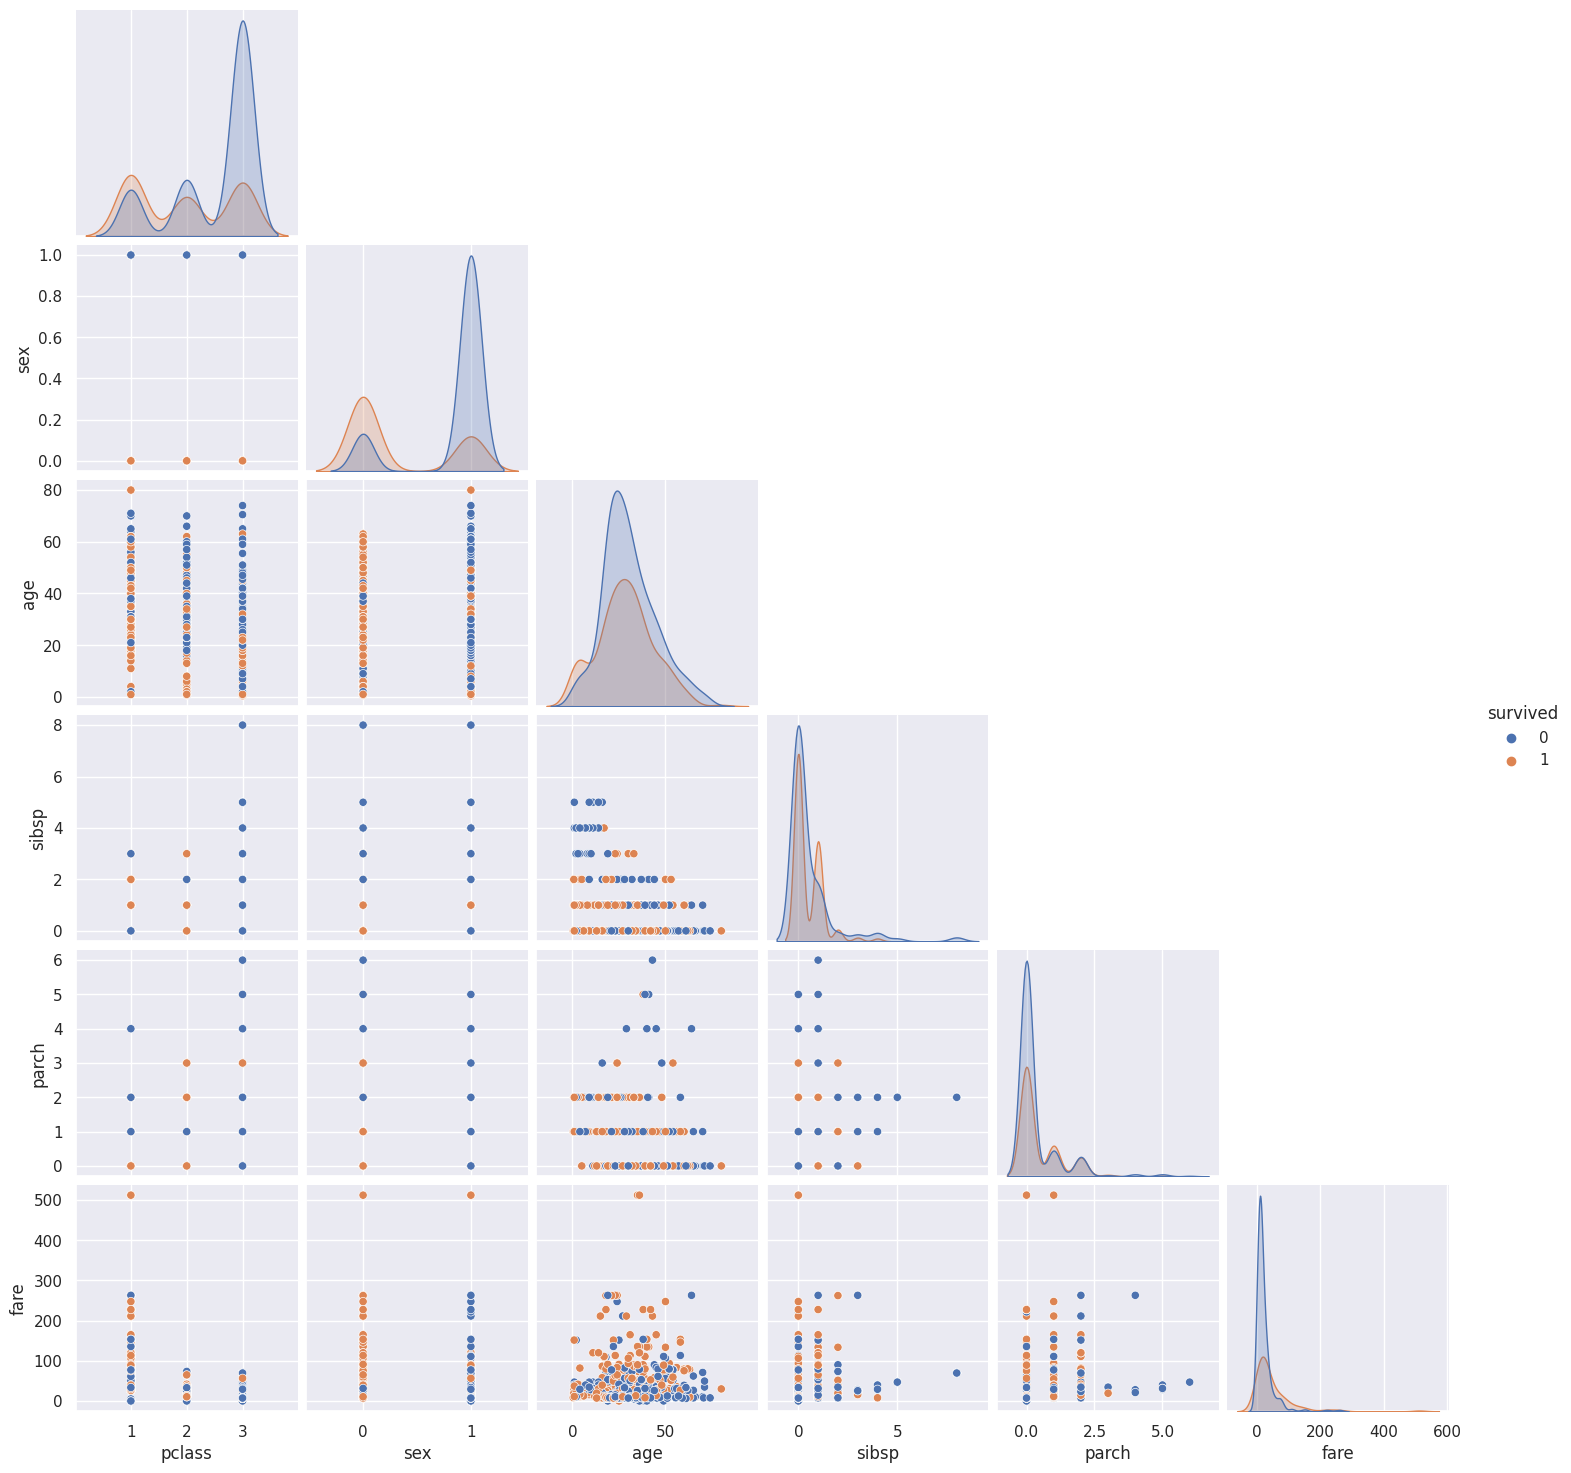

In [39]:
frac = 1
sns.pairplot(df.sample(frac=frac), corner=True, hue="survived")

In [40]:
EDA.study.outlier(df)

/home/alex/gargaml/env/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:184: RuntimeWarning:

Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.316244845904132 > -77.231427744006993). You may want to try with a higher value of support_fraction (current value: 0.506).

/home/alex/gargaml/env/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:184: RuntimeWarning:

Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.352316090858866 > -76.214974769797493). You may want to try with a higher value of support_fraction (current value: 0.506).



'shape Original : 891 shape_cleaned 802 => loss 0.1'

'--------- ORIGINAL ----------'

,survived,pclass,sex,age,sibsp,parch,fare
count,891.00,891.00,891.00,891.00,891.00,891.00,891.00
mean,0.38,2.31,0.65,30.05,0.52,0.38,32.20
std,0.49,0.84,0.48,13.67,1.10,0.81,49.69
min,0.00,1.00,0.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,0.00,21.20,0.00,0.00,7.91
50%,0.00,3.00,1.00,28.00,0.00,0.00,14.45
75%,1.00,3.00,1.00,38.00,1.00,0.00,31.00
max,1.00,3.00,1.00,80.00,8.00,6.00,512.33


'--------- CLEANED ----------'

,survived,pclass,sex,age,sibsp,parch,fare
count,802.00,802.00,802.00,802.00,802.00,802.00,802.00
mean,0.35,2.42,0.68,29.72,0.45,0.30,20.12
std,0.48,0.77,0.47,13.70,0.90,0.66,17.74
min,0.00,1.00,0.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,0.00,21.00,0.00,0.00,7.90
50%,0.00,3.00,1.00,28.00,0.00,0.00,13.00
75%,1.00,3.00,1.00,36.95,1.00,0.00,26.25
max,1.00,3.00,1.00,80.00,5.00,4.00,90.00


,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,_outlier
0,1,0,3,"braund, mr. owen harris",1,22.0,1,0,a/5 21171,7.2500,NaN,s,0
1,2,1,1,"cumings, mrs. john bradley (florence briggs th...",0,38.0,1,0,pc 17599,71.2833,c85,c,0
2,3,1,3,"heikkinen, miss. laina",0,26.0,0,0,ston/o2. 3101282,7.9250,NaN,s,0
3,4,1,1,"futrelle, mrs. jacques heath (lily may peel)",0,35.0,1,0,113803,53.1000,c123,s,0
4,5,0,3,"allen, mr. william henry",1,35.0,0,0,373450,8.0500,NaN,s,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"montvila, rev. juozas",1,27.0,0,0,211536,13.0000,NaN,s,0
887,888,1,1,"graham, miss. margaret edith",0,19.0,0,0,112053,30.0000,b42,s,0
888,889,0,3,"johnston, miss. catherine helen ""carrie""",0,NaN,1,2,w./c. 6607,23.4500,NaN,s,0
889,890,1,1,"behr, mr. karl howell",1,26.0,0,0,111369,30.0000,c148,c,0


In [41]:
EDA.study.vif(df, scale=True)

,feature,vif
1,pclass,1.91
0,survived,1.67
6,fare,1.60
2,sex,1.52
3,age,1.32
5,parch,1.32
4,sibsp,1.28


# 2.5 ACP

In [42]:
X = df.drop(columns="survived")
y = df.survived

In [43]:
pca = EDA.pca(X)

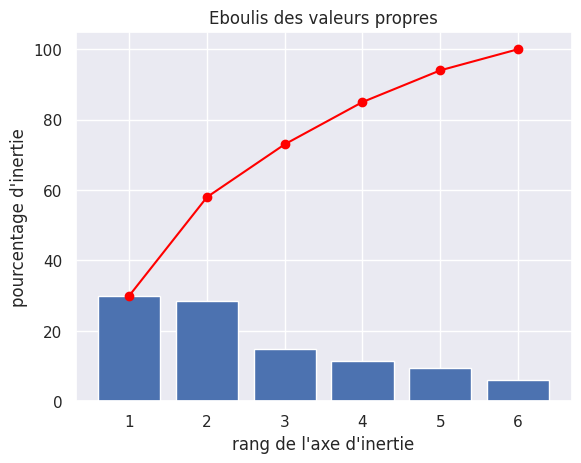

,variance,variance_cum
PC_1,0.30,0.30
PC_2,0.28,0.58
PC_3,0.15,0.73
PC_4,0.12,0.85
PC_5,0.09,0.94
PC_6,0.06,1.00


In [44]:
pca.variance

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6
pclass,-0.45,0.50,-0.00,-0.14,0.04,0.72
sex,-0.38,-0.15,0.83,0.28,0.25,-0.09
age,0.06,-0.56,0.22,-0.74,-0.07,0.29
sibsp,0.33,0.44,0.48,-0.15,-0.66,-0.09
parch,0.43,0.41,0.16,-0.34,0.70,-0.12
fare,0.59,-0.21,0.12,0.47,0.06,0.61


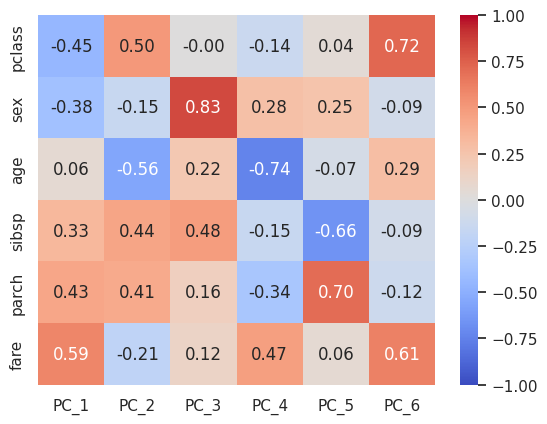

In [45]:
pca.pcs

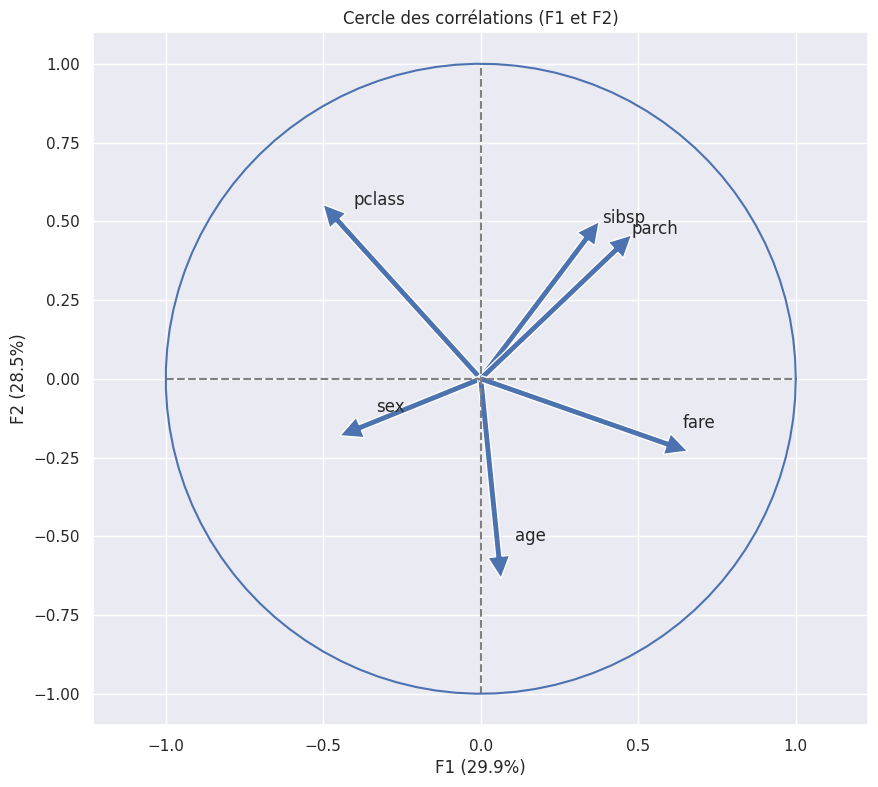

In [46]:
pca.correlation_graph([0,1])

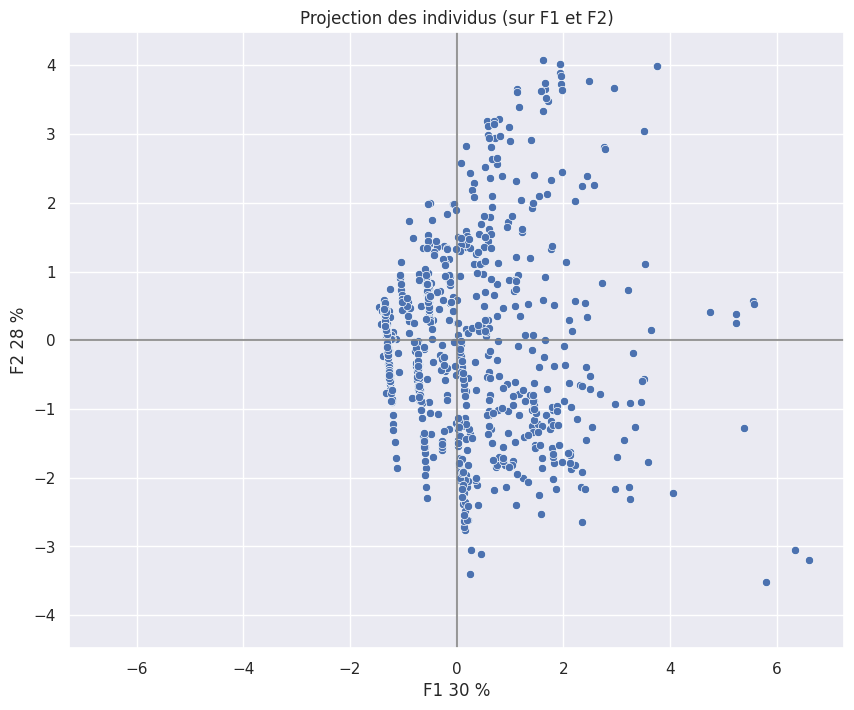

In [47]:
pca.factorial_planes([0,1])

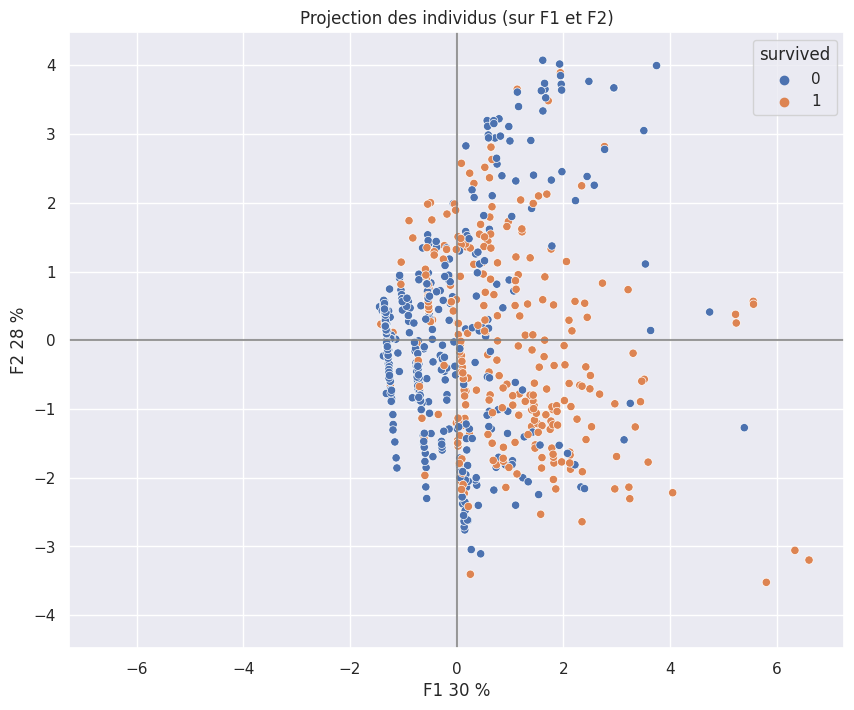

In [48]:
pca.factorial_planes([0,1], clusters=y)

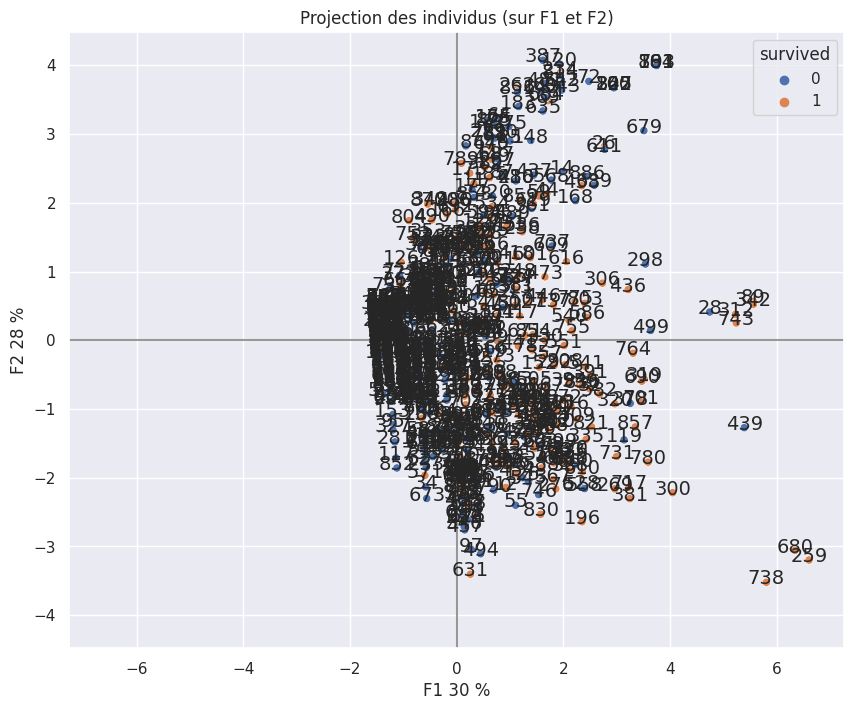

In [49]:
pca.factorial_planes([0,1], clusters=y, labels="passengerid")

In [50]:
pca.factorial_planes([0,1,2])

In [51]:
pca.factorial_planes([0,1,2],clusters=y)